# Assignment 4 Digital Image Processing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Task 1 : Image Segmentation Using Thresholing $[20 Marks]$

(a) Load a grayscale image and implement the following thresholding methods to segment the image:
- Binary Thresholding
- Adaptive Thresholding
- Otsu’s Thresholding

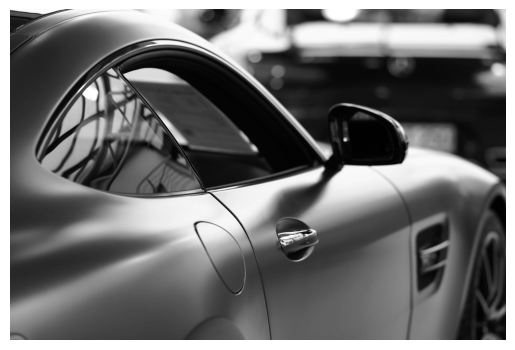

In [3]:
greycarImage = cv2.imread("./images/grey-car.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(greycarImage, cmap="gray")
plt.axis("off")
plt.show()

### Binary Thresholding

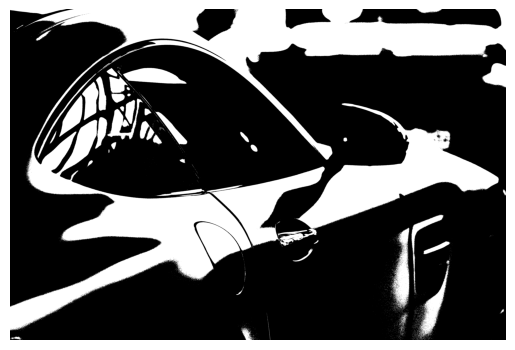

In [4]:
_, binarycarImage = cv2.threshold(greycarImage, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binarycarImage, cmap="gray")
plt.axis("off")
plt.show()

### Adaptive Thresholding

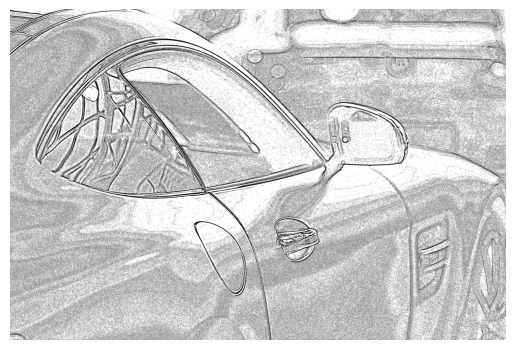

In [5]:
adaptiveThreshold = cv2.adaptiveThreshold(
    greycarImage, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)
plt.imshow(adaptiveThreshold, cmap="gray")
plt.axis("off")
plt.show()

### Otsu’s Thresholding

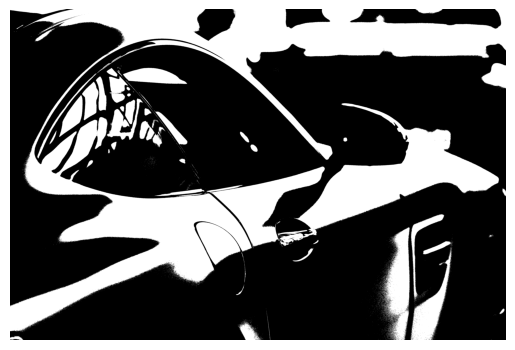

In [6]:
_, otsuThreshold = cv2.threshold(greycarImage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsuThreshold, cmap="gray")
plt.axis("off")
plt.show()

(b) Display the original and segmented images side by side for comparison, ensuring each method is clearly labeled. $(5 Marks)$

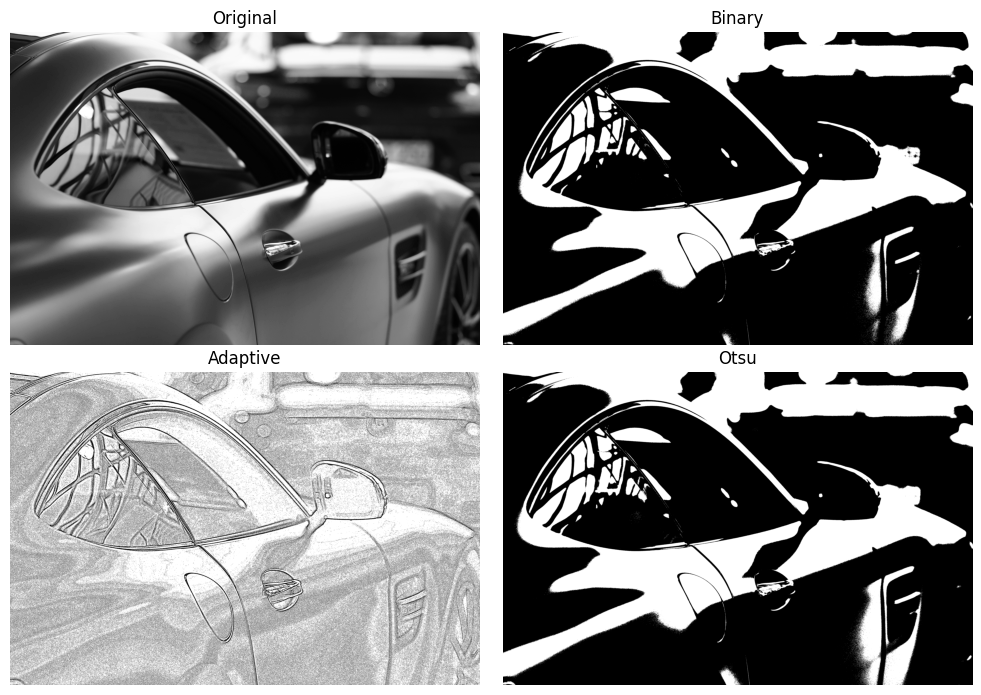

In [7]:
# Side by side comparison
plt.figure(figsize=(10, 7))
for i in range (4):
    plt.subplot(2, 2, i+1)
    plt.imshow([greycarImage, binarycarImage, adaptiveThreshold, otsuThreshold][i], cmap="gray")
    plt.axis("off")
    plt.title(f"{['Original','Binary','Adaptive', 'Otsu'][i]}")
    
plt.tight_layout()
plt.show()

(c) In 2-3 sentences, discuss which method provided the best segmentation for your image and why. Consider factors like clarity of object boundaries and noise levels. $(5 Marks)$

#### 1. Binary Thresholding
- **When it works better:**  
  Ideal for simple, high-contrast images where the foreground and background are easily separable.  
  - **Example:** Scanned black-and-white text documents.

- **Pros:**  
  - Fast and computationally efficient.  
  - Easy to implement.

- **Cons:**  
  - Fails with uneven lighting or low contrast.

---

#### 2. Adaptive Thresholding
- **When it works better:**  
  Best for images with varying lighting conditions or uneven illumination.  
  - **Example:** Text on textured or unevenly lit surfaces.

- **Pros:**  
  - Accounts for local variations in lighting.  
  - Effective in complex lighting conditions.

- **Cons:**  
  - Computationally expensive.  
  - Requires parameter tuning (block size, constant).

---

#### 3. Otsu's Thresholding
- **When it works better:**  
  Suitable for images with bimodal intensity histograms (two distinct peaks).  
  - **Example:** Coins on a uniform background.

- **Pros:**  
  - Automatically determines the optimal threshold.  
  - Effective for well-separated intensity distributions.

- **Cons:**  
  - Struggles with non-bimodal histograms.  
  - Sensitive to noise.

---


#### Summary
- Use **binary thresholding** for simple cases.  
- Use **Otsu’s thresholding** for bimodal histograms and global segmentation.  
- Use **adaptive thresholding** for complex, non-uniform lighting.

Overall, **adaptive thresholding** is the best choice for segmentation in this picture due to its ability to account for local variations in lighting.

## Task 2: Line Detection Using Hough Transform $(20 Marks)$

(a) Write a function to detect and highlight straight lines in an image using the Hough Line Transform. 
Make sure to use the Canny edge detector to preprocess the image before applying the Hough Transform.
$(10 Marks)$

(b) Test your function on an image with clear straight lines, such as a road, building, or grid structure. 
Display the original image and the processed image with highlighted lines. $(5 Marks)$

(c) Experiment with different threshold parameters in the Hough Transform to optimize line detection. 
In 2-3 sentences, describe the parameter changes and how they affected the results. $(5 Marks)$

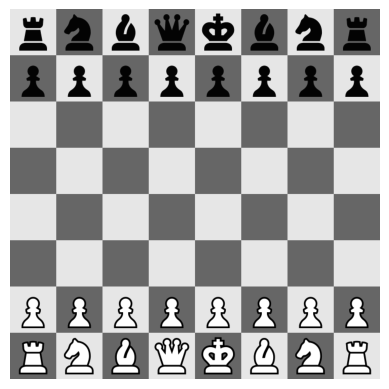

In [8]:
chessBoardImage = cv2.imread("./images/chess_board.png")
grayChessBoardImage = cv2.cvtColor(chessBoardImage, cv2.COLOR_BGR2GRAY)

plt.imshow(grayChessBoardImage, cmap="gray")
plt.axis("off")
plt.show()

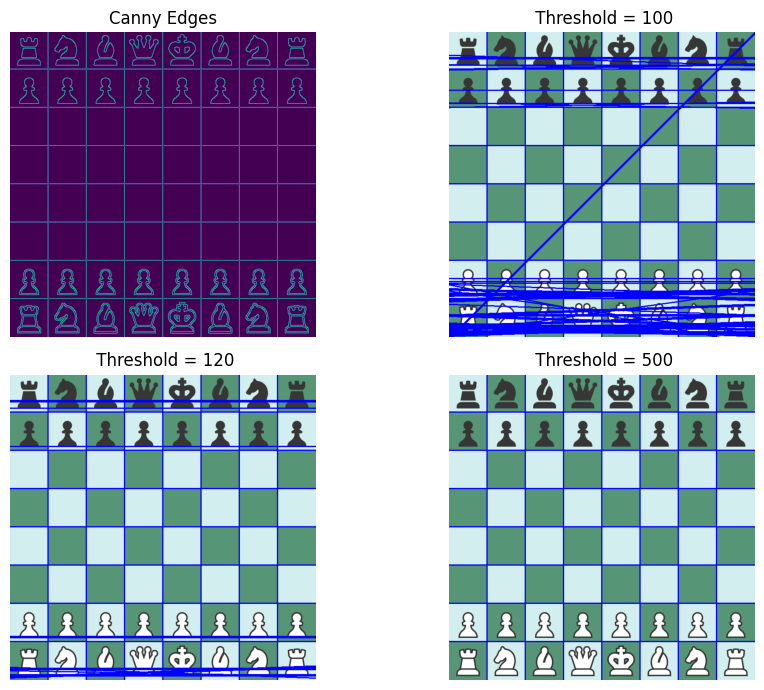

In [9]:
edges = cv2.Canny(grayChessBoardImage, 50, 150, apertureSize=3)

def HoughLineTransform(edges, threshold):
    result = chessBoardImage.copy()
    for line in cv2.HoughLines(edges, 1, np.pi / 180, threshold):
        if line is not None :
            for rho, theta in line:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2) # Blue color lines
    
    return result

thresholds = [100, 120, 500]

thresholdedImages = [HoughLineTransform(edges, threshold) for threshold in thresholds]

plt.figure(figsize=(10, 7))
for i in range(4):
    plt.subplot(2, 2, i+1)
    if i == 0 : 
        plt.imshow(edges)
        plt.title("Canny Edges")
    else :
        plt.imshow(thresholdedImages[i-1])
        plt.title(f" Threshold = {thresholds[i-1]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

The threshold is very important in this case. Lower threshold will result in more lines and more noise, threfore, depending on the image, the threshold needs to 
be adjusted in order for it to give meaningful results. Higher thresshild will result in less lines and less noise, but can miss out on weaker, less prominent lines.
Intermediate patterns can help identify features in the image that might be missed at first glance, or are difficult to spot by the naked eye.

## Task 3: Circle Detection Using Hough Circle Transform $(20 Marks)$

(a) Implement a function to detect circles in an image using the Hough
Circle Transform. Use suitable preprocessing steps (e.g., smoothing)
to improve detection accuracy. $(10 Marks)$

(b) Apply your function to an image with circular objects (e.g., coins,
wheels, or round signs). Display the original image and the processed
image with detected circles overlaid. $(5 Marks)$

(c) Experiment with different radius ranges and accumulator thresholds.
Display the results with and without these adjustments, and briefly
explain any improvements observed. $(5 Marks)$

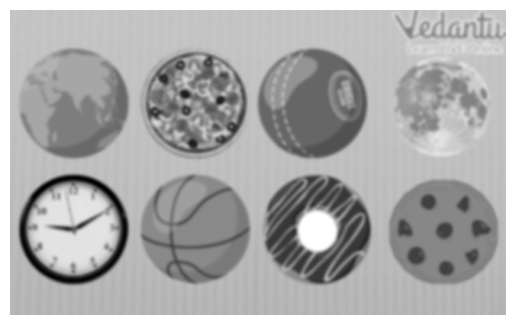

In [10]:
circleImages = cv2.imread("./images/circles.png")
grayCircleImages = cv2.cvtColor(circleImages, cv2.COLOR_BGR2GRAY)
blurredCircleImages = cv2.GaussianBlur(grayCircleImages, (9, 9), 2)

plt.imshow(blurredCircleImages, cmap="gray")
plt.axis("off")
plt.show()

In [11]:
def HoughCircleTransform(blurredCircleImage, dp, minDist, param1, param2, minRadius, maxRadius):
    result = circleImages.copy()
    circles = cv2.HoughCircles(blurredCircleImage, cv2.HOUGH_GRADIENT, dp, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            cv2.circle(result, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
            cv2.circle(result, (circle[0], circle[1]), 2, (0, 0, 255), 3)
    return result

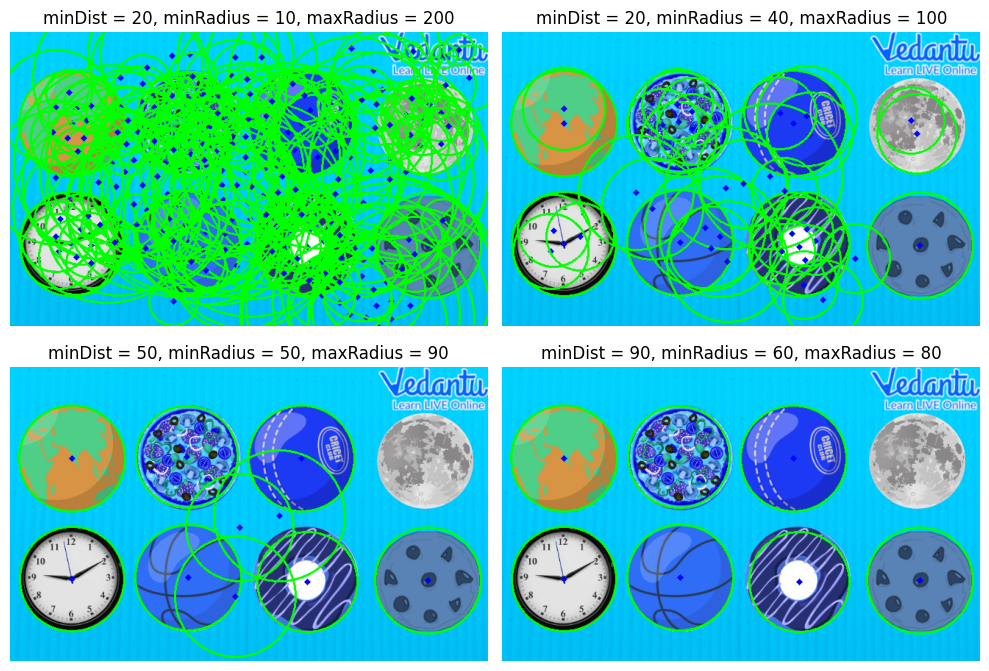

In [12]:
parameters = [
    [1, 20, 50, 30, 10, 200],
    [1, 20, 50, 30, 40, 100],
    [1, 50, 50, 30, 50, 90],
    [1, 90, 50, 30, 60, 80],
]

imgs = [HoughCircleTransform(blurredCircleImages, *param) for param in parameters]

plt.figure(figsize=(10, 7))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(imgs[i])
    plt.title(f"minDist = {parameters[i][1]}, minRadius = {parameters[i][4]}, maxRadius = {parameters[i][5]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

We can clearly see that changing the parameters, and making the thresholds stricter, can improve the results. It allows reduction of noise, 
but the moon was not detected as a by product of the improvement. Therefore, looser parameters can be used to allow detection of circles, and 
can prove as a good starting point, but tuning the parameters and making them stricter can improve the results.

## Task 4: Harris Corner Detection $(20 Marks)$

(a) Create a function to detect and mark corners in an image using the
Harris Corner Detection method. Use an appropriate method to
mark the detected corners on the original image. $(10 Marks)$

(b) Apply your function to an image with distinct corners, such as a chess-
board or a building with strong edges and corners. Display the original
and processed images with corners marked. $(5 Marks)$

(c) Vary the sensitivity parameter (typically called k) in the Harris Corner
Detection function. Observe how it affects corner detection, showing
both original and altered results. Briefly explain your findings in 2-3
sentences. $(5 Marks)$

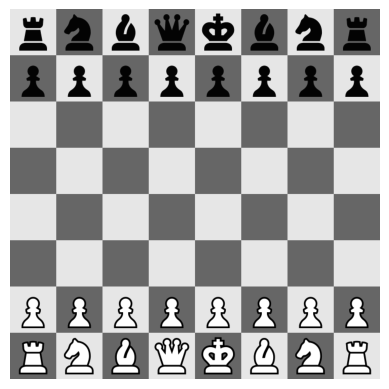

In [13]:
chessBoardImage = cv2.imread("./images/chess_board.png")
grayChessBoardImage = cv2.cvtColor(chessBoardImage, cv2.COLOR_BGR2GRAY)

plt.imshow(grayChessBoardImage, cmap="gray")
plt.axis("off")
plt.show()

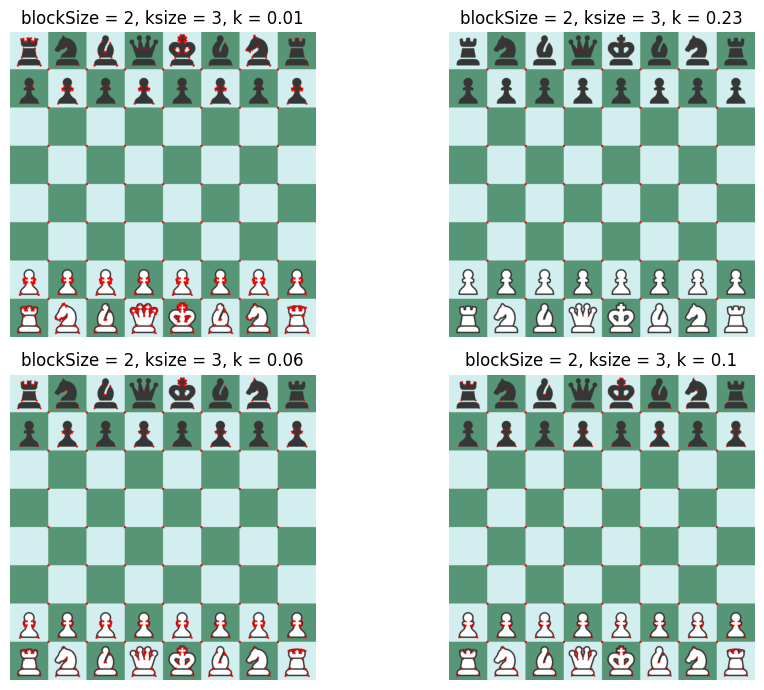

In [14]:
def HarrisCornerDetection(grayChessBoardImage, blockSize, ksize, k):
    result = chessBoardImage.copy()
    corners = cv2.cornerHarris(np.float32(grayChessBoardImage), blockSize=blockSize, ksize=ksize, k=k)
    corners = cv2.dilate(corners, None)
    result[corners > 0.01 * corners.max()] = [255, 0, 0]
    return result

parameters = [
    [2, 3, 0.01],
    [2, 3, 0.23],
    [2, 3, 0.06],
    [2, 3, 0.1],
]

imgs = [HarrisCornerDetection(grayChessBoardImage, *param) for param in parameters]

plt.figure(figsize=(10, 7))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(imgs[i])
    plt.title(f"blockSize = {parameters[i][0]}, ksize = {parameters[i][1]}, k = {parameters[i][2]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

With the value of $k$ set to $0.01$, we can see that a lot of edges are detected, even on edges of the pieces. Therefore, allowing very precise detection of boundaries and edges.
With the $k$ set to $0.23$, we see that almost all the edges detected are for the squares on the chess board.

The exact optimal value can depend on the task at hand, and the k parameter can be tuned to improve the results.

## Task 5 : Theory $(10 Marks)$


The Hough Transform for line detection maps image points to a 2D parameter space ($\rho$, $\theta$), where ρ is the perpendicular distance from the origin, 
and $\theta$ is the angle of the line. Each point in the image corresponds to a sinusoidal curve in parameter space, and intersections indicate lines.

For circle detection, the parameter space expands to 3D $(a, b, r)$, where $(a, b)$ are the circle's center coordinates, and $r$ is its radius. 
Each edge point in the image contributes to a cone in parameter space, making circle detection computationally more expensive due to increased dimensions.

Key Differences:

- Parameter Space: Lines use 2D $(ρ, θ)$; circles use 3D $(a, b, r)$.
- Computational Complexity: Circle detection is significantly more complex as it involves additional computations for radius, requiring larger memory and 
    more processing time compared to lines.